# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [5]:
pip install nba_api

     |████████████████████████████████| 125 kB 5.1 MB/s 
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=2ae1bbafab3b439fb4ffb69ab23cc49cc1e5c992e85f272f6e956ef204479208
  Stored in directory: /root/.cache/pip/wheels/e3/f4/46/996128675381abc175e306642bae575d372dcf7efc4683e551
Successfully built nba-api


In [363]:
import numpy as np
import pandas as pd
import time
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, commonallplayers, playerprofilev2


### Complete in this cell: get all active players from the api

def get_and_save_players_list():
    
    nba_players = commonallplayers.CommonAllPlayers(is_only_current_season=1)        #Retrieve all active players data from API

    filter1 = (nba_players.get_data_frames()[0]['TEAM_ID'] != 0) ; filter2 = (nba_players.get_data_frames()[0]['GAMES_PLAYED_FLAG'] != "N") ; filter3 = (nba_players.get_data_frames()[0]['PERSON_ID'] != 1630597)   #Filter prerequisites Masks    
    
    nba_players = nba_players.get_data_frames()[0].loc[filter1 & filter2 & filter3]  #Apply Filtering

    nba_players = nba_players.rename(columns={'PERSON_ID':'PLAYER_ID','DISPLAY_FIRST_LAST':'PLAYER_NAME'}) ; nba_players = nba_players.set_index('PLAYER_ID') ;  nba_players = nba_players[['PLAYER_NAME']]  #Rename Columns & setting player_id as index & Filter df

    return nba_players


In [364]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")
current_players_list

,PLAYER_NAME
PLAYER_ID,
1630173,Precious Achiuwa
203500,Steven Adams
1628389,Bam Adebayo
1630583,Santi Aldama
200746,LaMarcus Aldridge
...,...
1628221,Gabe York
201152,Thaddeus Young
1629027,Trae Young


2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [360]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def sleepAndPrint(x):   
    '''Sleep API call and show retrieving number'''
    time.sleep(1.5)        
    x += 1 
    print("Retrieving player n°: {0}".format(x), end = "\r")
    return x
        
def get_players_personal_information(current_players_list):
    '''Retrieves personal information trough API'''
    commonInfo = pd.DataFrame()
    count=0
    for y in current_players_list.index:   
        commonInfo = commonInfo.append(commonplayerinfo.CommonPlayerInfo(player_id =str(y) ,timeout=30).get_data_frames()[0])
        count = sleepAndPrint(count)
    commonInfo = commonInfo[["PERSON_ID","DISPLAY_FIRST_LAST","TEAM_NAME","POSITION","HEIGHT","WEIGHT","COUNTRY","BIRTHDATE","SEASON_EXP","DRAFT_NUMBER"]]  ; commonInfo = commonInfo.rename(columns={'PERSON_ID':'PLAYER_ID','DISPLAY_FIRST_LAST':'PLAYER_NAME'}) ; commonInfo = commonInfo.set_index('PLAYER_ID') #Filter & rename & set playerId as index in dataframe
        
    return commonInfo


In [361]:
nba_players_personal_info = get_players_personal_information(current_players_list)
nba_players_personal_info = nba_players_personal_info.to_csv("personal_player_information.csv")


In [414]:
## Read csv from disk, Filter and rename columns ##

players_personal_info = pd.read_csv('personal_player_information.csv')
players_personal_info = players_personal_info.set_index('PLAYER_ID')
players_personal_info

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER
PLAYER_ID,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2
...,...,...,...,...,...,...,...,...,...
1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,0,Undrafted
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [415]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
    player_career_stats = pd.DataFrame()
    count=0
    for y in current_players_list.index:
        player_career_stats = player_career_stats.append(playerprofilev2.PlayerProfileV2(per_mode36="PerGame",player_id=str(y)).career_totals_regular_season.get_data_frame(),sort=False)  #pull data from endpoint & filter dataframe using playerID
        count = sleepAndPrint(count)
    player_career_stats = player_career_stats[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]] ; player_career_stats = player_career_stats.set_index('PLAYER_ID') #Filter dataframes & set playerID as index                                      #setting player_id as index
    return player_career_stats


*Retriving data using API:

In [416]:
nba_players_career_stats = get_players_career_stats(current_players_list)
nba_players_career_stats.to_csv("nba_players_career_stats.csv")


*Read csv nba_player_career_stats.csv from disk:

In [417]:
players_career_stats = pd.read_csv('nba_players_career_stats.csv')
players_career_stats = players_career_stats.set_index('PLAYER_ID')
players_career_stats



,GP,MIN,PTS,REB,AST,STL,BLK
PLAYER_ID,,,,,,,
1630173,134,18.4,7.2,5.1,0.8,0.4,0.5
203500,664,26.8,9.3,8.0,1.5,0.9,0.9
1628389,343,28.2,13.5,8.3,3.5,1.0,0.9
1630583,32,11.3,4.1,2.7,0.7,0.2,0.3
200746,1076,33.7,19.1,8.1,1.9,0.7,1.1
...,...,...,...,...,...,...,...
1628221,2,10.5,4.0,1.0,2.0,1.0,0.5
201152,1085,29.3,12.8,5.8,1.8,1.4,0.4
1629027,280,33.6,25.3,3.9,9.1,0.9,0.2


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [418]:
### Complete in this cell: find players next game

def get_players_next_game(current_players_list):
    player_next_game = pd.DataFrame()
    count=0
    for y in current_players_list.index:
        player_data = playerprofilev2.PlayerProfileV2(per_mode36="PerGame",player_id=str(y),timeout=50).next_game.get_data_frame()  #pull data from endpoint using playerID
        player_data.insert(0, "PLAYER_ID", y, True)
        player_next_game = player_next_game.append(player_data)
        count = sleepAndPrint(count)       
    player_next_game = player_next_game[["PLAYER_ID","GAME_DATE"]] ; player_next_game = player_next_game.set_index('PLAYER_ID')
    return player_next_game

Get next_game from API:

In [10]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

,GAME_DATE
PLAYER_ID,
1630173,APR 23 2022
203500,APR 23 2022
1628389,APR 24 2022
1630583,APR 23 2022
200746,APR 23 2022
...,...
1630589,APR 23 2022
1630593,APR 23 2022
201152,APR 23 2022


*Read csv nba_players_next_game.csv from disk:

In [419]:
players_next_game = pd.read_csv('nba_players_next_game.csv')
players_next_game = players_next_game.set_index('PLAYER_ID')
players_next_game

,GAME_DATE
PLAYER_ID,
1630173,APR 23 2022
203500,APR 23 2022
1628389,APR 24 2022
1630583,APR 23 2022
200746,APR 23 2022
...,...
1630589,APR 23 2022
1630593,APR 23 2022
201152,APR 23 2022


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [12]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):
    salaries = pd.read_html('https://hoopshype.com/salaries/players/')[0]
    salaries = salaries.rename(columns={'Player':'PLAYER_NAME','2021/22':'SALARY'})
    salaries = salaries[["PLAYER_NAME", "SALARY"]]

    return salaries

In [13]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")
players_salaries

,PLAYER_NAME,SALARY
0,Stephen Curry,"$45,780,966"
1,John Wall,"$44,310,840"
2,James Harden,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,Kevin Durant,"$42,018,900"
...,...,...
649,Craig Sword,"$53,176"
650,Luca Vildoza,"$42,789"
651,Zavier Simpson,"$37,223"
652,Mfiondu Kabengele,"$19,186"


*Read csv nba_players_next_game.csv from disk:

In [420]:
players_salaries = pd.read_csv("nba_players_salary.csv",index_col=0)
players_salaries

,PLAYER_NAME,SALARY
0,Stephen Curry,"$45,780,966"
1,John Wall,"$44,310,840"
2,James Harden,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,Kevin Durant,"$42,018,900"
...,...,...
649,Craig Sword,"$53,176"
650,Luca Vildoza,"$42,789"
651,Zavier Simpson,"$37,223"
652,Mfiondu Kabengele,"$19,186"


6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [421]:
### Complete in this cell: merge the dataframes
from functools import reduce

def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    
    dfs = [players_personal_info, players_career_stats, players_next_game]                   # df List

    dataframe = reduce(lambda a,b: pd.merge(a,b,on='PLAYER_ID', how="left"), dfs)            # Reduce & apply lambda for pair merging     
    
    dataframe = [dataframe, players_salaries]                                                # df second list to merge
    
    dataframe = reduce(lambda a,b: pd.merge(a,b, on='PLAYER_NAME',right_index=True, how='inner'),dataframe)    # Merge with players_salaries
    
    return dataframe

In [422]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")
raw_players_dataset

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,APR 23 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,APR 23 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,APR 24 2022,"$28,103,500"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,APR 23 2022,"$2,641,691"
1629638,Nickeil Alexander-Walker,Jazz,Guard,6-5,205,Canada,1998-09-02T00:00:00,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,APR 23 2022,"$3,261,480"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,6-8,226,USA,1998-12-23T00:00:00,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,APR 23 2022,"$172,821"
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,APR 23 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,APR 24 2022,"$8,326,471"


## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [423]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
    working_df = raw_players_dataset.copy(deep=True)     #remove all players with no teams or salary was not neccesary, i have done in the merge step,
    return working_df

In [424]:
working_df = copy_and_delete_nan(raw_players_dataset)
working_df.dropna(axis=0, subset=['SALARY'])

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,APR 23 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,APR 23 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,APR 24 2022,"$28,103,500"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,APR 23 2022,"$2,641,691"
1629638,Nickeil Alexander-Walker,Jazz,Guard,6-5,205,Canada,1998-09-02T00:00:00,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,APR 23 2022,"$3,261,480"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,6-8,226,USA,1998-12-23T00:00:00,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,APR 23 2022,"$172,821"
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,APR 23 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,APR 24 2022,"$8,326,471"


2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [425]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    working_df['SALARY'] = working_df['SALARY'].replace('[\$\,)]','', regex=True).astype(int)
    working_df['BIRTHDATE'] = working_df['BIRTHDATE'].astype('datetime64')
    working_df['GAME_DATE'] = working_df['GAME_DATE'].astype('datetime64')
    return working_df

In [426]:
cast_columns(working_df)


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-23,17073171
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-24,28103500
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691
1629638,Nickeil Alexander-Walker,Jazz,Guard,6-5,205,Canada,1998-09-02,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,2022-04-23,3261480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,6-8,226,USA,1998-12-23,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,2022-04-23,172821
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-24,8326471


3- Create a function that converts the height column from height in feet and inches to centimeters

In [427]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
    working_df['HEIGHT'] = working_df['HEIGHT'].apply(lambda x : round(int(x[:1])*30.48 + int(x[2:])*2.54,0))
    return working_df

In [428]:
convert_height_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,225,Nigeria,1999-09-19,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280
203500,Steven Adams,Grizzlies,Center,211.0,265,New Zealand,1993-07-20,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-23,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206.0,255,USA,1997-07-18,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-24,28103500
200746,LaMarcus Aldridge,Nets,Center-Forward,211.0,250,USA,1985-07-19,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691
1629638,Nickeil Alexander-Walker,Jazz,Guard,196.0,205,Canada,1998-09-02,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,2022-04-23,3261480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,203.0,226,USA,1998-12-23,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,2022-04-23,172821
201152,Thaddeus Young,Raptors,Forward,203.0,235,USA,1988-06-21,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000
1629027,Trae Young,Hawks,Guard,185.0,164,USA,1998-09-19,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-24,8326471


4- Create a function that converts the weight column from pounds to kilograms

In [429]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
    working_df['WEIGHT'] = working_df['WEIGHT'].apply(lambda x : round(int(x)*0.453592),0)
    return working_df

In [430]:
convert_weight_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,102,Nigeria,1999-09-19,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280
203500,Steven Adams,Grizzlies,Center,211.0,120,New Zealand,1993-07-20,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-23,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206.0,116,USA,1997-07-18,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-24,28103500
200746,LaMarcus Aldridge,Nets,Center-Forward,211.0,113,USA,1985-07-19,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691
1629638,Nickeil Alexander-Walker,Jazz,Guard,196.0,93,Canada,1998-09-02,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,2022-04-23,3261480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,203.0,103,USA,1998-12-23,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,2022-04-23,172821
201152,Thaddeus Young,Raptors,Forward,203.0,107,USA,1988-06-21,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000
1629027,Trae Young,Hawks,Guard,185.0,74,USA,1998-09-19,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-24,8326471


5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [431]:
### Complete in this cell: add age column
from dateutil.relativedelta import relativedelta
import datetime
import calendar


def add_age_column(working_df):
    today = date.today()
    edad = pd.DataFrame()
    edad = edad.append([relativedelta(today,x) for x in working_df['BIRTHDATE']])
    edad[0] = edad[0].astype('str') ; edad = edad[0].str.replace("relativedelta\(","").str.replace("\)","")
    working_df = working_df.assign(AGE=edad.values)
    return working_df



In [432]:
working_df = add_age_column(working_df)
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,102,Nigeria,1999-09-19,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280,"years=+22, months=+7, days=+5"
203500,Steven Adams,Grizzlies,Center,211.0,120,New Zealand,1993-07-20,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-23,17073171,"years=+28, months=+9, days=+4"
1628389,Bam Adebayo,Heat,Center-Forward,206.0,116,USA,1997-07-18,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-24,28103500,"years=+24, months=+9, days=+6"
200746,LaMarcus Aldridge,Nets,Center-Forward,211.0,113,USA,1985-07-19,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691,"years=+36, months=+9, days=+5"
1629638,Nickeil Alexander-Walker,Jazz,Guard,196.0,93,Canada,1998-09-02,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,2022-04-23,3261480,"years=+23, months=+7, days=+22"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,203.0,103,USA,1998-12-23,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,2022-04-23,172821,"years=+23, months=+4, days=+1"
201152,Thaddeus Young,Raptors,Forward,203.0,107,USA,1988-06-21,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000,"years=+33, months=+10, days=+3"
1629027,Trae Young,Hawks,Guard,185.0,74,USA,1998-09-19,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-24,8326471,"years=+23, months=+7, days=+5"


6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [433]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
    working_df['POSITION']  = working_df['POSITION'].str.split("-").str[0]
    return working_df

In [434]:
update_position(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,102,Nigeria,1999-09-19,1,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280,"years=+22, months=+7, days=+5"
203500,Steven Adams,Grizzlies,Center,211.0,120,New Zealand,1993-07-20,8,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-23,17073171,"years=+28, months=+9, days=+4"
1628389,Bam Adebayo,Heat,Center,206.0,116,USA,1997-07-18,4,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-24,28103500,"years=+24, months=+9, days=+6"
200746,LaMarcus Aldridge,Nets,Center,211.0,113,USA,1985-07-19,15,2,1076.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691,"years=+36, months=+9, days=+5"
1629638,Nickeil Alexander-Walker,Jazz,Guard,196.0,93,Canada,1998-09-02,2,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,2022-04-23,3261480,"years=+23, months=+7, days=+22"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,203.0,103,USA,1998-12-23,0,Undrafted,4.0,3.8,1.3,0.8,0.5,0.0,0.3,2022-04-23,172821,"years=+23, months=+4, days=+1"
201152,Thaddeus Young,Raptors,Forward,203.0,107,USA,1988-06-21,14,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000,"years=+33, months=+10, days=+3"
1629027,Trae Young,Hawks,Guard,185.0,74,USA,1998-09-19,3,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-24,8326471,"years=+23, months=+7, days=+5"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [440]:
#Formatting types:

working_df['HEIGHT'] = working_df['HEIGHT'].astype('int64')
working_df['WEIGHT'] = working_df['WEIGHT'].astype('float64')
working_df['DRAFT_NUMBER'] = pd.to_numeric(working_df['DRAFT_NUMBER'], errors='coerce').astype(dtype={'DRAFT_NUMBER': pd.Int8Dtype()})
working_df['GP'] = working_df['GP'].fillna(0)
working_df['GP'] = working_df['GP'].astype('int64')


working_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 1630173 to 1627826
Data columns (total 19 columns):
PLAYER_NAME     451 non-null object
TEAM_NAME       451 non-null object
POSITION        451 non-null object
HEIGHT          451 non-null int64
WEIGHT          451 non-null float64
COUNTRY         451 non-null object
BIRTHDATE       451 non-null datetime64[ns]
SEASON_EXP      451 non-null int64
DRAFT_NUMBER    347 non-null Int8
GP              451 non-null int64
MIN             450 non-null float64
PTS             450 non-null float64
REB             450 non-null float64
AST             450 non-null float64
STL             450 non-null float64
BLK             450 non-null float64
GAME_DATE       240 non-null datetime64[ns]
SALARY          451 non-null int64
AGE             451 non-null object
dtypes: Int8(1), datetime64[ns](2), float64(7), int64(4), object(5)
memory usage: 67.8+ KB


In [441]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,102.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280,"years=+22, months=+7, days=+5"
203500,Steven Adams,Grizzlies,Center,211,120.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-23,17073171,"years=+28, months=+9, days=+4"
1628389,Bam Adebayo,Heat,Center,206,116.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-24,28103500,"years=+24, months=+9, days=+6"
200746,LaMarcus Aldridge,Nets,Center,211,113.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691,"years=+36, months=+9, days=+5"
1629638,Nickeil Alexander-Walker,Jazz,Guard,196,93.0,Canada,1998-09-02,2,17,158,19.4,9.3,2.6,2.2,0.7,0.3,2022-04-23,3261480,"years=+23, months=+7, days=+22"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,203,103.0,USA,1998-12-23,0,NaN,4,3.8,1.3,0.8,0.5,0.0,0.3,2022-04-23,172821,"years=+23, months=+4, days=+1"
201152,Thaddeus Young,Raptors,Forward,203,107.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000,"years=+33, months=+10, days=+3"
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-24,8326471,"years=+23, months=+7, days=+5"


In [442]:
working_df.to_csv("nba_players_processed_dataset.csv")

In [1]:
import pandas as pd

working_df = pd.read_csv('nba_players_processed_dataset.csv')

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [3]:
### Complete in this cell: print general metrics

##Total number of players:
total_players = working_df.PLAYER_NAME.size
print('Total Players: {0}\n'.format(total_players))

##USA born players:
usa_born_players = (working_df[working_df['COUNTRY'] == 'USA'])
usa_born_players = usa_born_players['COUNTRY'].count()
print('USA born players: {0}\n'.format(usa_born_players))

##Foreign Players
foreign_players = (working_df[working_df['COUNTRY'] != 'USA'])
foreign_players = foreign_players['COUNTRY'].count()
print('Foreign born players: {0}\n'.format(foreign_players))

##Players per position
pp_players = working_df.groupby(['POSITION'])['POSITION'].count()
print('Number of players per position: \n{0}\n'.format(pp_players))

##Players per team
pt_players = working_df.groupby(['TEAM_NAME'])['TEAM_NAME'].count()
print('Number of players per team:\n{0}\n'.format(pt_players))

##Number of Rookies
rookie_players = working_df[working_df['SEASON_EXP'] <=1 ]
rookie_players = rookie_players['SEASON_EXP'].count()
print('Number of rookie players:\n{0}\n'.format(rookie_players))


Total Players: 451

USA born players: 340

Foreign born players: 111

Number of players per position: 
POSITION
Center      60
Forward    170
Guard      221
Name: POSITION, dtype: int64

Number of players per team:
TEAM_NAME
76ers            16
Bucks            17
Bulls            16
Cavaliers        16
Celtics          17
Clippers         14
Grizzlies        15
Hawks            13
Heat             15
Hornets          15
Jazz             14
Kings            15
Knicks           16
Lakers           16
Magic            15
Mavericks        16
Nets             13
Nuggets          16
Pacers           13
Pelicans         12
Pistons          15
Raptors          15
Rockets          14
Spurs            13
Suns             15
Thunder          16
Timberwolves     16
Trail Blazers    16
Warriors         16
Wizards          15
Name: TEAM_NAME, dtype: int64

Number of rookie players:
140



In [4]:
### Complete in this cell: print players descriptions
    
    
##Average player age (in years)
years = working_df['AGE'].str.split(",").str[0].str.split("+").str[1]
average_age = int(round(years.astype('int64').mean(),0))
print('Average players Age:\n{0}\n'.format(average_age))



#Youngest player age (years and days, i.e: 18 years and 16 days)
date = pd.DataFrame()
date['YEAR'] = working_df['AGE'].str.split(",").str[0].str.split("+").str[1]     #Filter & create a new df for
date['MONTHS'] = working_df['AGE'].str.split(",").str[1].str.split("+").str[1]   #year,month,days from workingdf
date['DAYS'] = working_df['AGE'].str.split(",").str[2].str.split("+").str[1]

date = date.fillna(0)
date = date.sort_values(by = ['YEAR', 'MONTHS', 'DAYS'], ascending=[False,False,False])   #sort values descent


print('Youngest player is:\n')
print(date.tail(1))
print('--------------------------')



#Oldest player age (years and days, i.e: 40 years and 160 days)
print('\nOldest player is:\n')
print(date.head(1))
print('--------------------------')




#Min and Max players height
player_h = pd.DataFrame()
player_h = working_df['HEIGHT'].sort_values(ascending=False)

print('\nMin player height is:\n')
print(player_h.tail(1))
print('--------------------------')

print('\nMax player height is:\n')
print(player_h.head(1))
print('--------------------------')




#Average height of players per position

avg_ppp = working_df.groupby(['POSITION'])
print('\nAverage height per position is:\n')
print(round(avg_ppp['HEIGHT'].mean()))
print('--------------------------')




Average players Age:
26

Youngest player is:

    YEAR MONTHS DAYS
290   19     10   24
--------------------------

Oldest player is:

    YEAR MONTHS DAYS
169   41     10   15
--------------------------

Min player height is:

396    175
Name: HEIGHT, dtype: int64
--------------------------

Max player height is:

333    221
Name: HEIGHT, dtype: int64
--------------------------

Average height per position is:

POSITION
Center     211.0
Forward    203.0
Guard      192.0
Name: HEIGHT, dtype: float64
--------------------------


In [5]:

### Complete in this cell: Contracts

#Min and Max contract salary
from babel.numbers import format_currency

contracts = pd.DataFrame()
contracts = working_df['SALARY'].sort_values(ascending=False)
contracts = contracts.apply(lambda x: format_currency(x, currency="USD"))

print('\nMin player salary is:\n')
print(contracts.iloc[-1])
print('--------------------------')

print('\nMax player salary is:\n')
print(contracts.iloc[0])
print('--------------------------')






Min player salary is:

US$ 42.789,00
--------------------------

Max player salary is:

US$ 45.780.966,00
--------------------------


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

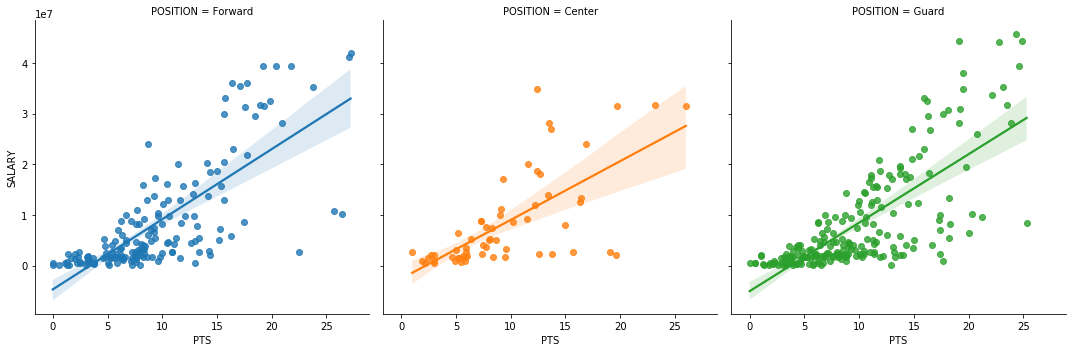

In [7]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt


sns.lmplot(data=working_df, x="PTS", y="SALARY", col="POSITION",hue="POSITION")





3- Now plot assists-vs-salary and rebounding-vs-salary

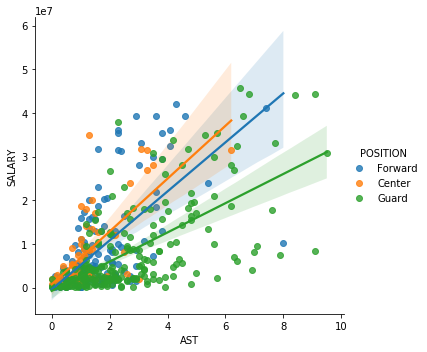

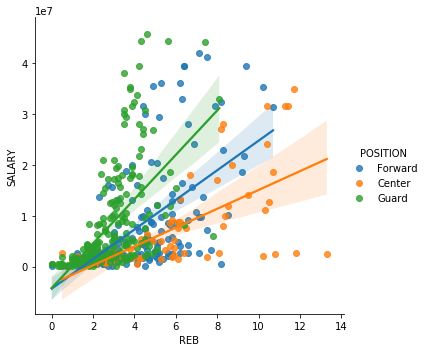

In [8]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary

g1 = sns.lmplot(data=working_df, x="AST", y="SALARY",hue="POSITION")

g2 = sns.lmplot(data=working_df, x="REB", y="SALARY",hue="POSITION")






4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

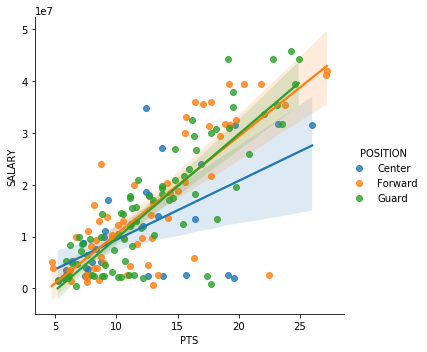

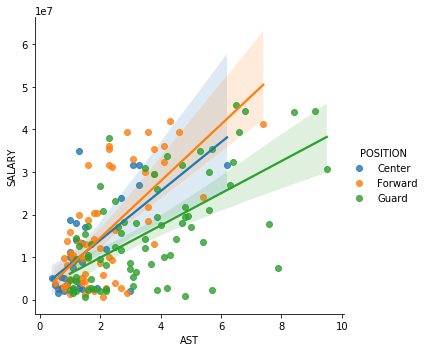

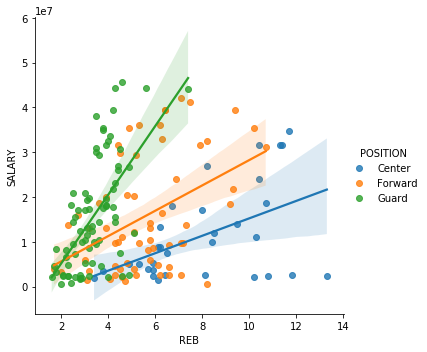

In [9]:
### Complete in this cell: non rookie contracts

rookie_df = working_df[working_df.SEASON_EXP > 4]

g3 = sns.lmplot(data=rookie_df, x="PTS", y="SALARY",hue="POSITION")

g4 = sns.lmplot(data=rookie_df, x="AST", y="SALARY",hue="POSITION")

g5 = sns.lmplot(data=rookie_df, x="REB", y="SALARY",hue="POSITION")




5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

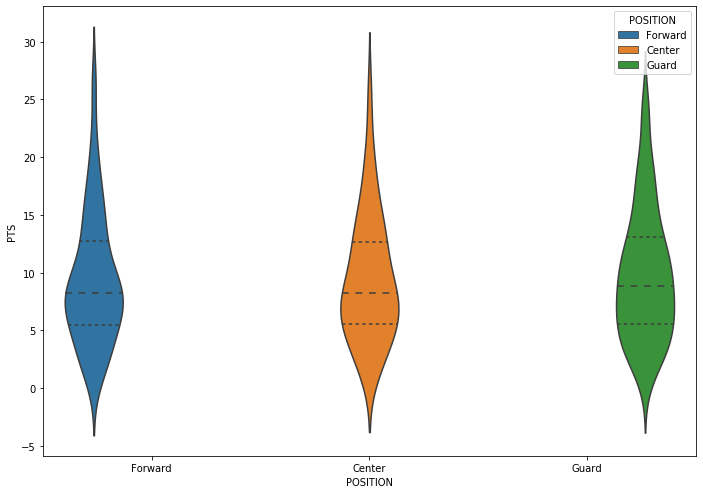

In [50]:
### Complete in this cell: Scoring average grouped by position
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,data=working_df,hue='POSITION',y='PTS',x='POSITION',inner="quartile")




6- Plot the Height distribution of all players

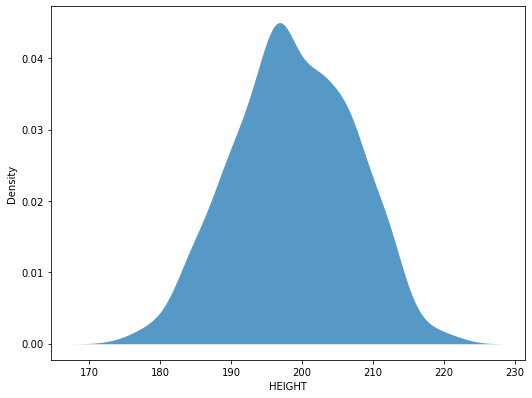

In [47]:
### Complete in this cell: height distribution
a4_dims = (8.5, 6.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.kdeplot(ax=ax,data=working_df, x="HEIGHT",
   fill=True, 
   alpha=.75, linewidth=0,
)





OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

In [54]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium

##Players per country

pp_country = working_df.groupby(['COUNTRY'])['COUNTRY'].count()
pp_country = pd.DataFrame({'COUNTRY':pp_country.index, 'COUNT':pp_country.values})
pp_country = pp_country.replace(['Bosnia and Herzegovina'],'Bosnia and Herz.')
pp_country = pp_country.replace(['Republic of the Congo'],'Dem. Rep. Congo')
pp_country = pp_country.replace(['Dominican Republic'],'Dominican Rep.')
pp_country = pp_country.replace(['USA'],'United States of America')


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
pd.set_option('display.max_rows', None)
world
pp_country

pp = world.merge(pp_country , how='left', left_on=['name'], right_on=['COUNTRY'])
pp = pp.dropna(subset=['COUNTRY'])
pp

m = folium.Map()
folium.Choropleth(
    geo_data=pp,
    name="choropleth",
    data=pp,
    columns=["COUNTRY", "COUNT"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="NBA players over the world.",
).add_to(m)

folium.LayerControl().add_to(m)

m